In [1]:
import pickle
import time 

import numpy as np
import mbuild as mb
from mbuild.examples import Alkane
from foyer import Forcefield
from foyer.forcefield import generate_topology
import matplotlib.pyplot as plt
import time

In [2]:
water_data = dict()
hexane_data = dict()
hexane = Alkane(6)
hexane.name = 'HEX'
# tip3p = mb.load('tip3p.pdb')
# argon = mb.Compound()
# argon.name = 'Ar'
# ARGON = Forcefield('ar.xml')
OPLS = Forcefield(name='oplsaa')
# TIP3P = Forcefield('tip3p.xml')

/Users/mwt/software/foyer/foyer/validator.py:163: ValidationWarning: There are 703 atom types that are missing a smarts definition. To view the missing atom types, re-run with debug=True when applying the forcefield.
  "applying the forcefield.".format(len(missing_smarts)), ValidationWarning)


In [ ]:
hexane_data['times'] = list()
hexane_data['sizes'] = np.logspace(1, 2, 12, dtype=np.int)

for n_compounds in hexane_data['sizes']:
    hexane_box = mb.fill_box(hexane, n_compounds, [100, 100, 100])
    hexane_box = hexane_box.to_parmed()
    t0 = time.time()
    OPLS.apply(hexane_box)
    hexane_data['times'].append((time.time() - t0))

In [ ]:
hexaneDF = pd.DataFrame(hexane_data)
hexaneDF.to_pickle('hexane.pkl')

p = np.polyfit(hexaneDF['sizes'], hexaneDF['times'], 1)

plt.figure()
plt.loglog(hexaneDF['sizes'], hexaneDF['times'], 'o-')
plt.loglog(hexaneDF['sizes'], [p[1] + p[0]*val for val in hexaneDF['sizes']])

plt.xlabel('Number of hexane molecules')
plt.ylabel('Atomtyping time (s)')
plt.savefig('hexane.pdf')

In [ ]:
water_data['times'] = list()
water_data['sizes'] = np.logspace(1, 3, 12, dtype=np.int)

for n_compounds in water_data['sizes']:
    water_box = mb.fill_box(tip3p, n_compounds, [100, 100, 100], overlap=0.01)
    water_box = water_box.to_parmed()
    t0 = time.time()
    TIP3P.apply(water_box)
    water_data['times'].append((time.time() - t0))

In [ ]:
waterDF = pd.DataFrame(water_data)
waterDF.to_pickle('water.pkl')

In [ ]:
p = np.polyfit(waterDF['sizes'], waterDF['times'], 1)

In [ ]:
plt.figure()
plt.loglog(waterDF['sizes'], waterDF['times'], 'o-')
plt.loglog(waterDF['sizes'], [p[1] + p[0]*val for val in waterDF['sizes']])
plt.xlabel('Number of water molecules')
plt.ylabel('Atomtyping time (s)')
plt.savefig('water.pdf')

In [ ]:
polymer_data = dict()

polymer_data['times'] = list()
polymer_data['sizes'] = np.logspace(1, 3, 12, dtype=np.int)

for polymer_length in polymer_data['sizes']:
    polymer = Alkane(polymer_length)
    polymer = polymer.to_parmed()
    t0 = time.time()
    OPLS.apply(polymer)
    polymer_data['times'].append((time.time() - t0))

In [ ]:
polymerDF = pd.DataFrame(polymer_data)
polymerDF.to_pickle('polymer.pkl')

p = np.polyfit(polymerDF['sizes'], polymerDF['times'], 1)

plt.figure()
plt.loglog(polymerDF['sizes'], polymerDF['times'], 'o-')
plt.loglog(polymerDF['sizes'], [p[1] + p[0]*val for val in polymerDF['sizes']])

plt.xlabel('Length of polymer')
plt.ylabel('Atomtyping time (s)')
plt.savefig('polymer.pdf')

In [ ]:
argon_data = dict()

argon_data['times'] = list()
argon_data['sizes'] = np.logspace(1, 4, 12, dtype=np.int)

for n_compounds in argon_data['sizes']:
    argon_box = mb.fill_box(argon, n_compounds, [100, 100, 100], overlap=0.01)
    argon_box = argon_box.to_parmed()
    t0 = time.time()
    ARGON.apply(argon_box)
    argon_data['times'].append((time.time() - t0))

In [ ]:
fig, ax = plt.subplots()
ax.plot([3 * n for n in waterDF['sizes']], waterDF['times'], label='water')
ax.plot([20 * n for n in hexaneDF['sizes']], hexaneDF['times'], label='hexane')
ax.plot([2 + 3 * n for n in polymerDF['sizes']], polymerDF['times'], label='polymer')
ax.legend(loc=0)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [ ]:
scaleup_data = dict()
hexane_data['sizes'] = np.unique(np.logspace(0,  3, 16, dtype=np.int))
#hexane_data['sizes'] = np.append(hexane_data['sizes'], np.logspace(1, 2, 3, dtype=np.int))
hexane_data['times_no_map'] = list()
hexane_data['times_with_map'] = list()

n_trials = 10

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, n_compounds in enumerate(hexane_data['sizes']):
    plt.close()
    hexane_box = mb.fill_box(hexane, n_compounds, [100, 100, 100])
    hexane_box = hexane_box.to_parmed(residues=['HEX'])
    topology, positions = generate_topology(hexane_box, residues=['HEX'])
#     t0 = time.time()
#     OPLS.createSystem(topology, atomtype=False)
#     tp_time = time.time() - t0
    t0 = time.time()
    for _ in range(n_trials):
        #OPLS.createSystem(topology, atomtype=True, use_residue_map=False)
        OPLS.apply(hexane_box, use_residue_map=False)
    hexane_data['times_no_map'].append((time.time() - t0) / n_trials)
    t0 = time.time()
    for _ in range(10):
        #OPLS.createSystem(topology, atomtype=True, use_residue_map=True)
        OPLS.apply(hexane_box, use_residue_map=True)
    hexane_data['times_with_map'].append((time.time() - t0) / n_trials)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].loglog(hexane_data['sizes'][:len(hexane_data['times_no_map'])], hexane_data['times_no_map'], 'o-', label='no map')
    axes[0].loglog(hexane_data['sizes'][:len(hexane_data['times_no_map'])], hexane_data['times_with_map'], 'o-', label='with map')
    axes[1].semilogx(hexane_data['sizes'][:len(hexane_data['times_no_map'])], [x / y for x, y in zip(hexane_data['times_no_map'], hexane_data['times_with_map'])], 'o-')

    plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].loglog(hexane_data['sizes'], hexane_data['times_no_map'], 'o-', label='no map')
axes[0].loglog(hexane_data['sizes'], hexane_data['times_with_map'], 'o-', label='with map')
axes[1].semilogx(hexane_data['sizes'], [x / y for x, y in zip(hexane_data['times_no_map'], hexane_data['times_with_map'])], 'o-')
plt.show()

In [ ]:
[len(val) for key, val in hexane_data.items()]

In [ ]:
import numpy as np
import dask.array as da
x = np.arange(1000)
y = da.from_array(x, chunks=(100))
y.mean().compute()

In [ ]:
with open('hexane_data.pickle', 'wb') as handle:
    pickle.dump(hexane_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
with open('hexane_data.pickle', 'rb') as handle:
    b = pickle.load(handle)

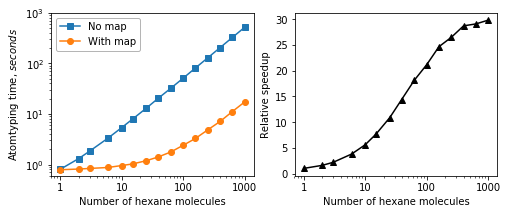

In [31]:
import matplotlib

fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].loglog(b['sizes'], b['times_no_map'], 's-', label='No map')
axes[0].loglog(b['sizes'], b['times_with_map'], 'o-', label='With map')
axes[1].semilogx(b['sizes'], [x / y for x, y in zip(b['times_no_map'], b['times_with_map'])], 'k^-')

legend = axes[0].legend(loc=0, fancybox=True, ncol=1, columnspacing=None)
legend.legendPatch.set_edgecolor('#A3A3A3')
legend.legendPatch.set_lw(1)
axes[0].set_ylim((0.6, 1000))
axes[0].set_xticks([1, 10, 100, 1000])#20, 200, 500])

for ax in axes:
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

for ax in axes:
    ax.set_xlabel('Number of hexane molecules')

axes[0].set_ylabel(r'Atomtyping time, $seconds$')
axes[1].set_ylabel('Relative speedup')

plt.savefig('summary.pdf')

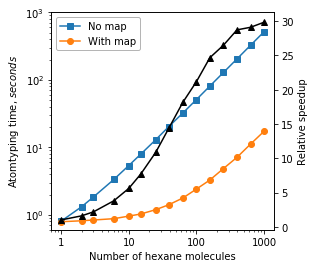

In [32]:
import matplotlib

fig, axes[0] = plt.subplots(figsize=(4, 4))

axes[1] = axes[0].twinx()

axes[0].loglog(b['sizes'], b['times_no_map'], 's-', label='No map')
axes[0].loglog(b['sizes'], b['times_with_map'], 'o-', label='With map')
axes[1].semilogx(b['sizes'], [x / y for x, y in zip(b['times_no_map'], b['times_with_map'])], 'k^-', label='speedup')

legend = axes[0].legend(loc=0, fancybox=True, ncol=1, columnspacing=None)
legend.legendPatch.set_edgecolor('#A3A3A3')
legend.legendPatch.set_lw(1)
axes[0].set_ylim((0.6, 1000))
axes[0].set_xticks([1, 10, 100, 1000])#20, 200, 500])

for ax in axes:
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

for ax in axes:
    ax.set_xlabel('Number of hexane molecules')

axes[0].set_ylabel(r'Atomtyping time, $seconds$')
axes[1].set_ylabel('Relative speedup')

plt.savefig('combined.pdf')

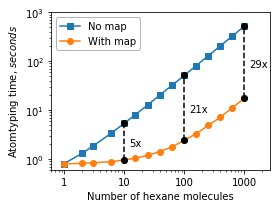

In [63]:
import matplotlib

fig, ax = plt.subplots(figsize=(4, 3))

ax.loglog(b['sizes'], b['times_no_map'], 's-', label='No map')
ax.loglog(b['sizes'], b['times_with_map'], 'o-', label='With map')
#axes[1].semilogx(b['sizes'], [x / y for x, y in zip(b['times_no_map'], b['times_with_map'])], 'k^-', label='speedup')

for idx, label in zip([4, 9, 14], ['5', '20', '30']):
    ax.plot([b['sizes'][idx], b['sizes'][idx]], [b['times_with_map'][idx], b['times_no_map'][idx]], 'ko--')
    speedup = b['times_with_map'][idx] ** -1 * b['times_no_map'][idx]
    label = str(int(speedup))
    ax.annotate(label + 'x', xy=(1.2 * b['sizes'][idx], 0.8 * np.sqrt([b['times_with_map'][idx] * b['times_no_map'][idx]])))

legend = ax.legend(loc=0, fancybox=True, ncol=1, columnspacing=None)
legend.legendPatch.set_edgecolor('#A3A3A3')
legend.legendPatch.set_lw(1)
ax.set_ylim((0.6, 1000))
ax.set_xlim((0.6, 2700))
ax.set_xticks([1, 10, 100, 1000])#20, 200, 500])

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.set_xlabel('Number of hexane molecules')

ax.set_ylabel(r'Atomtyping time, $seconds$')
#axes[1].set_ylabel('Relative speedup')

plt.tight_layout()
plt.savefig('ties.pdf')

/Users/mwt/anaconda/envs/mosdef/lib/python3.5/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


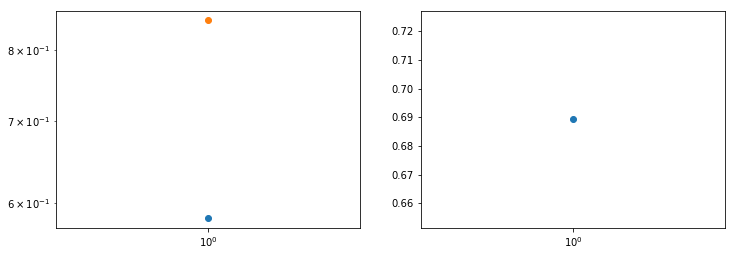

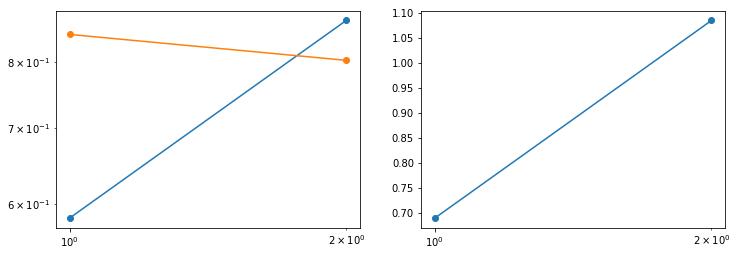

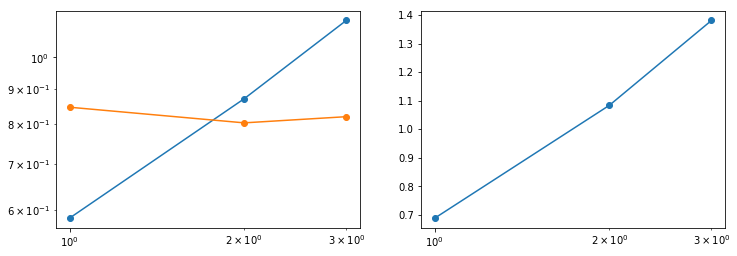

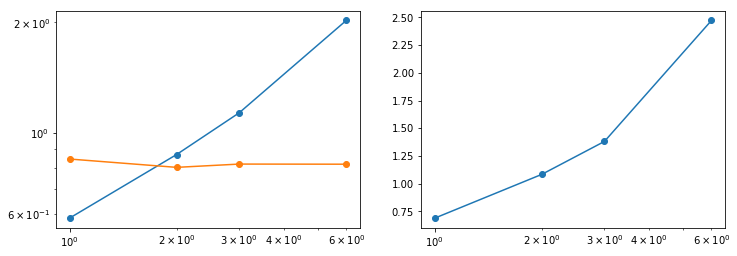

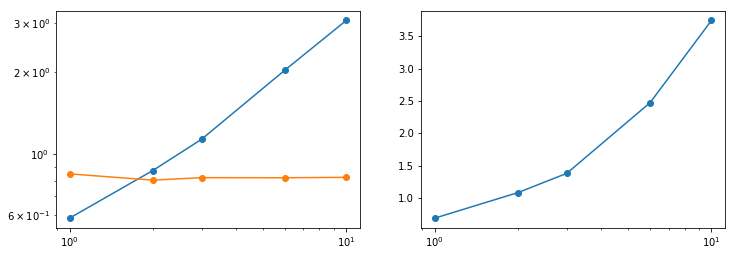

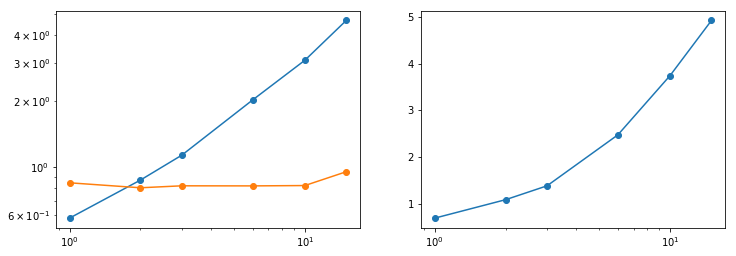

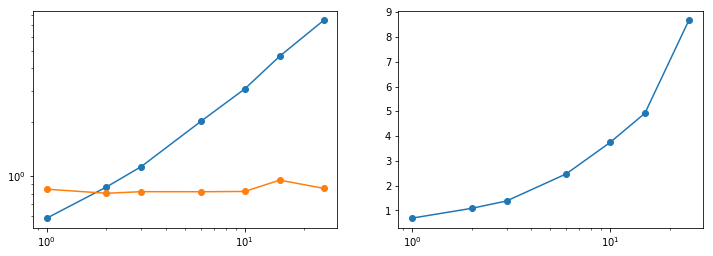

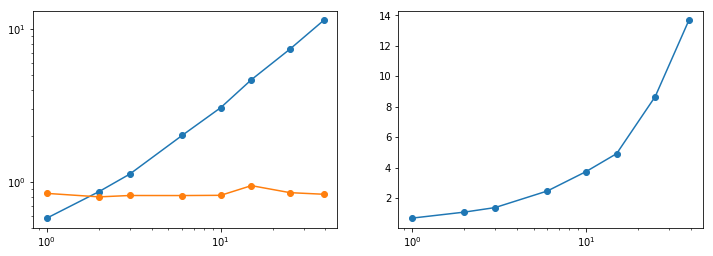

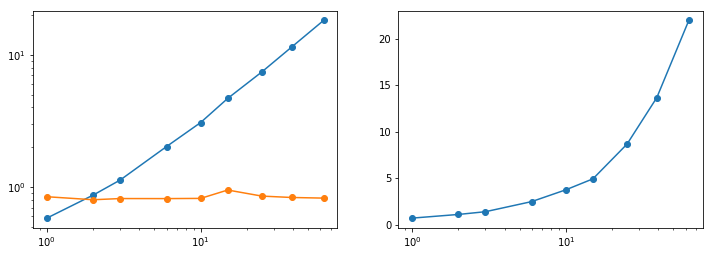

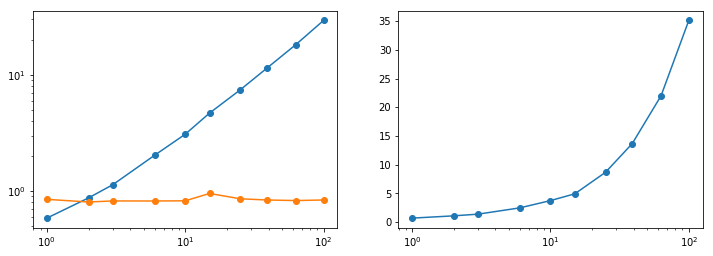

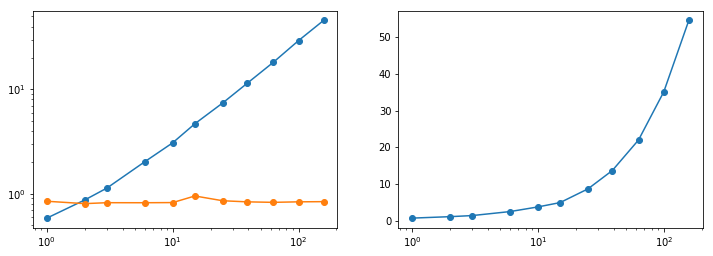

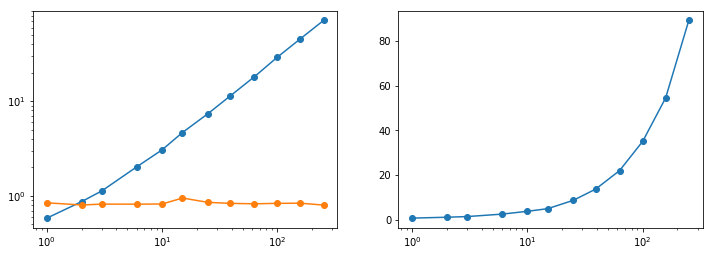

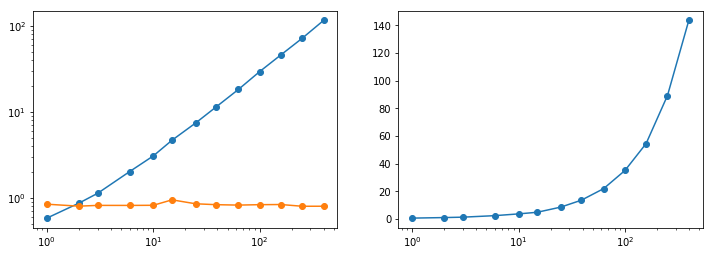

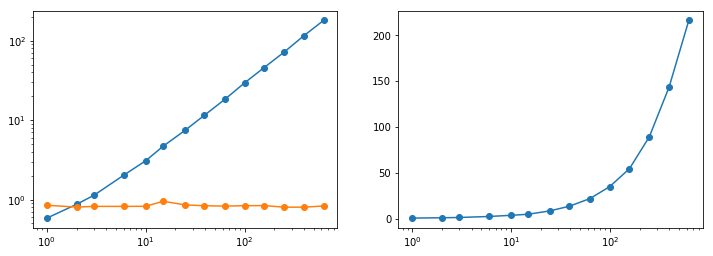

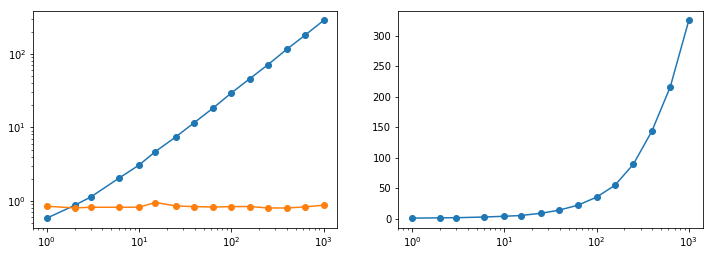

In [4]:
scaleup_data = dict()
hexane_data['sizes'] = np.unique(np.logspace(0,  3, 16, dtype=np.int))
#hexane_data['sizes'] = np.append(hexane_data['sizes'], np.logspace(1, 2, 3, dtype=np.int))
hexane_data['times_no_map'] = list()
hexane_data['times_with_map'] = list()

n_trials = 10

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, n_compounds in enumerate(hexane_data['sizes']):
    plt.close()
    hexane_box = mb.fill_box(hexane, n_compounds, [100, 100, 100])
    hexane_box = hexane_box.to_parmed(residues=['HEX'])
    topology, positions = generate_topology(hexane_box, residues=['HEX'])
#     t0 = time.time()
#     OPLS.createSystem(topology, atomtype=False)
#     tp_time = time.time() - t0
    t0 = time.time()
    for _ in range(n_trials):
        #OPLS.createSystem(topology, atomtype=True, use_residue_map=False)
        #OPLS.apply(hexane_box, use_residue_map=False)
        OPLS.run_atomtyping(topology, use_residue_map=False)
    hexane_data['times_no_map'].append((time.time() - t0) / n_trials)
    t0 = time.time()
    for _ in range(10):
        #OPLS.createSystem(topology, atomtype=True, use_residue_map=True)
        #OPLS.apply(hexane_box, use_residue_map=True)
        OPLS.run_atomtyping(topology, use_residue_map=True)
    hexane_data['times_with_map'].append((time.time() - t0) / n_trials)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].loglog(hexane_data['sizes'][:len(hexane_data['times_no_map'])], hexane_data['times_no_map'], 'o-', label='no map')
    axes[0].loglog(hexane_data['sizes'][:len(hexane_data['times_no_map'])], hexane_data['times_with_map'], 'o-', label='with map')
    axes[1].semilogx(hexane_data['sizes'][:len(hexane_data['times_no_map'])], [x / y for x, y in zip(hexane_data['times_no_map'], hexane_data['times_with_map'])], 'o-')

    plt.show()